Monte Carlo Simulation - Law of Large Numbers
Population Mean: 0.5
Population Standard Deviation: 10
Vector size per iteration: 100
Total iterations: 1000
Iteration    1 | Total samples:    100 | Mean:  -0.5385 | Error:   1.0385
Iteration   10 | Total samples:   1000 | Mean:   0.6933 | Error:   0.1933
Iteration   50 | Total samples:   5000 | Mean:   0.5560 | Error:   0.0560
Iteration  100 | Total samples:  10000 | Mean:   0.4786 | Error:   0.0214
Iteration  500 | Total samples:  50000 | Mean:   0.4958 | Error:   0.0042
Iteration 1000 | Total samples: 100000 | Mean:   0.5097 | Error:   0.0097


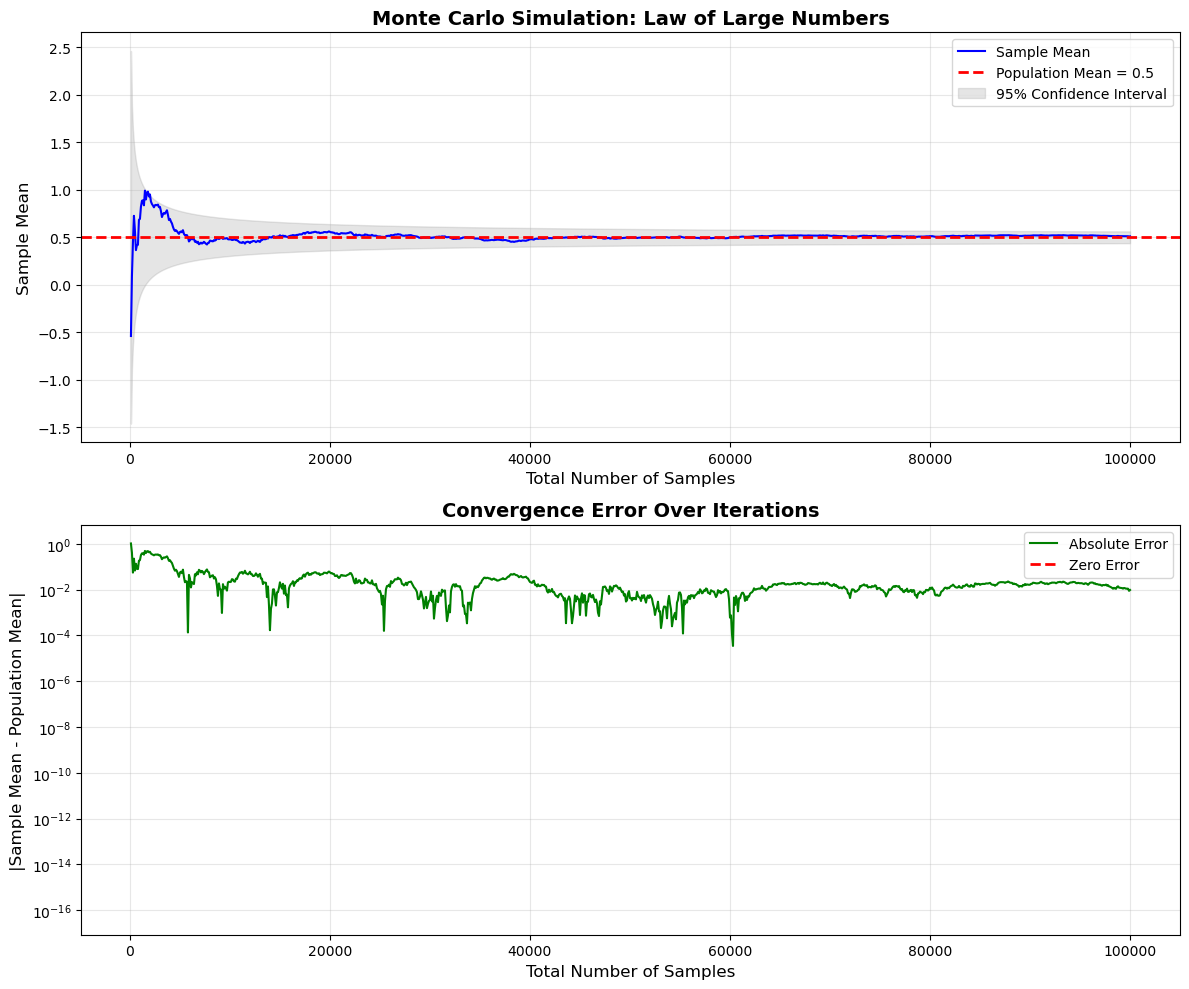


Final Results:
Total samples generated: 100000
Final sample mean: 0.509669
Population mean: 0.5
Final error: 0.009669


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define population parameters
population_mean = 0.5
population_std = 10


# Monte Carlo simulation parameters
num_iterations = 1000  # Number of iterations
sample_size_per_iteration = 100  # Size of vector generated at each iteration


# Store the cumulative mean at each iteration
cumulative_sum = 0
sample_means = []
total_samples = []

print("Monte Carlo Simulation - Law of Large Numbers")
print("=" * 60)
print(f"Population Mean: {population_mean}")
print(f"Population Standard Deviation: {population_std}")
print(f"Vector size per iteration: {sample_size_per_iteration}")
print(f"Total iterations: {num_iterations}")
print("=" * 60)

# Monte Carlo simulation
for i in range(1, num_iterations + 1):
    # Generate a new random vector at this iteration
    new_samples = np.random.normal(population_mean, population_std, sample_size_per_iteration)
    
    # Update cumulative sum
    cumulative_sum += np.sum(new_samples)
    
    # Calculate total number of samples so far
    total_n = i * sample_size_per_iteration
    total_samples.append(total_n)
    
    # Calculate current sample mean
    current_mean = cumulative_sum / total_n
    sample_means.append(current_mean)
    
    # Print progress at specific iterations
    if i in [1, 10, 50, 100, 500, 1000]:
        diff = abs(current_mean - population_mean)
        print(f"Iteration {i:4d} | Total samples: {total_n:6d} | Mean: {current_mean:8.4f} | Error: {diff:8.4f}")

print("=" * 60)

# Create visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Sample mean convergence
axes[0].plot(total_samples, sample_means, label='Sample Mean', color='blue', linewidth=1.5)
axes[0].axhline(y=population_mean, color='red', linestyle='--', linewidth=2, 
                label=f'Population Mean = {population_mean}')

# Add confidence bands
total_samples_array = np.array(total_samples)
std_error = population_std / np.sqrt(total_samples_array)
axes[0].fill_between(total_samples_array, 
                      population_mean - 1.96 * std_error, 
                      population_mean + 1.96 * std_error, 
                      alpha=0.2, color='gray', label='95% Confidence Interval')

axes[0].set_xlabel('Total Number of Samples', fontsize=12)
axes[0].set_ylabel('Sample Mean', fontsize=12)
axes[0].set_title('Monte Carlo Simulation: Law of Large Numbers', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Error (difference from population mean)
errors = [abs(mean - population_mean) for mean in sample_means]
axes[1].plot(total_samples, errors, label='Absolute Error', color='green', linewidth=1.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Total Number of Samples', fontsize=12)
axes[1].set_ylabel('|Sample Mean - Population Mean|', fontsize=12)
axes[1].set_title('Convergence Error Over Iterations', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')  # Log scale to better see convergence

plt.tight_layout()
plt.show()

# Final statistics
print(f"\nFinal Results:")
print(f"Total samples generated: {total_samples[-1]}")
print(f"Final sample mean: {sample_means[-1]:.6f}")
print(f"Population mean: {population_mean}")
print(f"Final error: {errors[-1]:.6f}")